<a href="https://colab.research.google.com/github/PanduDLaksono/PVCK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import library
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#koneksi ke google drive 

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mengubah brightness
-------------------
Masukan kecerahan : 35


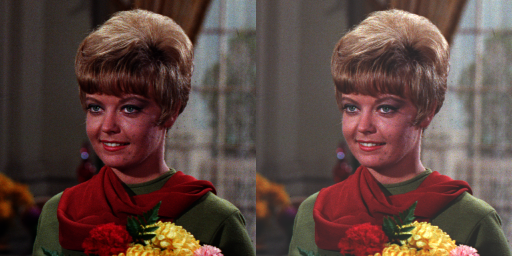

In [5]:
print('Mengubah brightness')
print('-------------------')

try:
  brightness = int(input('Masukan kecerahan : '))
except ValueError:
  print('Error, not number...')

original = cv.imread('/content/drive/MyDrive/Polinema/PCVK_2021/images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses data per pixel

for y in range (original.shape[0]):
  for x in range (original.shape[1]):
    for c in range (original.shape[2]):
      brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)



# **TUGAS**

Mengubah Kontras
-------------------
Masukan kecerahan : 50
Masukan kontras: 1.5


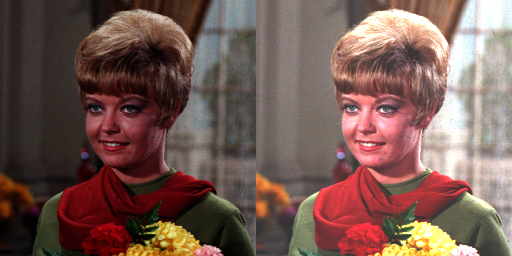

In [9]:
#1. Implementasikan transformasi contrast
print('Mengubah Kontras')
print('-------------------')

try:
  brightness = int(input('Masukan kecerahan : '))
  kontras = float(input('Masukan kontras: '))
except ValueError:
  print('Error, not number...')

original = cv.imread('/content/drive/MyDrive/Polinema/PCVK_2021/images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses data per pixel

for y in range (original.shape[0]):
  for x in range (original.shape[1]):
    for c in range (original.shape[2]):
      brightness_image[y, x, c] = np.clip(kontras * original[y, x, c] + brightness, 0, 255)

final_frame_2 = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame_2)


Mengubah Brightness dengan log
-------------------
Masukan kecerahan : 40


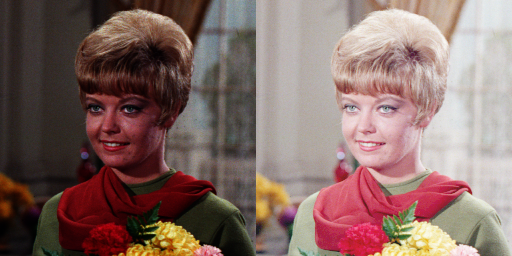

In [12]:
#2. Implementasi transformasi logarithmic brightness

print('Mengubah Brightness dengan log')
print('-------------------')

try:
  brightness = int(input('Masukan kecerahan : '))
except ValueError:
  print('Error, not number...')

original = cv.imread('/content/drive/MyDrive/Polinema/PCVK_2021/images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# Log tranform
#c = 255/(log (1 + m)), dimana m = maksimun nilai pixel di citra
brightness = 255/(np.log(1 + np.max(original)))

for y in range (original.shape[0]):
  for x in range (original.shape[1]):
    for c in range (original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1+original[y,x,c])),0,255)

final_frame_3 = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame_3)


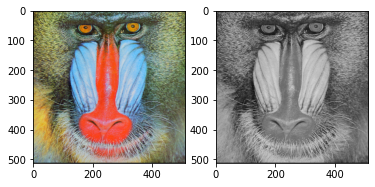

In [72]:
#a. average

original = cv.cvtColor(cv.imread('/content/drive/MyDrive/Polinema/PCVK_2021/images/mandrill.tiff'), cv.COLOR_BGR2RGB)
original_g = cv.imread('/content/drive/MyDrive/Polinema/PCVK_2021/images/mandrill.tiff')

R = original[:,:,0]
G = original[:,:,1]
B = original[:,:,2]

average = R/3 + G/3 + B/3
original_g[:, :, 0] = average
original_g[:, :, 1] = average
original_g[:, :, 2] = average

axs[0].imshow(original)
axs[1].imshow(original_g, cmap='gray')

fig, axs = plt.subplots(1, 2)
axs[0].imshow(original)
axs[1].imshow(original_g)

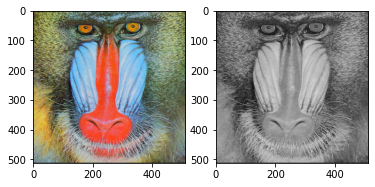

In [63]:
#a. Lightness

original = cv.cvtColor(cv.imread('/content/drive/MyDrive/Polinema/PCVK_2021/images/mandrill.tiff'), cv.COLOR_BGR2RGB)
original_lg= cv.cvtColor(cv.imread('/content/drive/MyDrive/Polinema/PCVK_2021/images/mandrill.tiff'), cv.COLOR_BGR2RGB)

# R, G, B = original[:, :, 2], original[:, :, 1], original[:, :, 0]

# max_l = np.maximum(np.mininum(R, G), B)
# min_l = np.minimum(np.minimum(R, G), B)
# original_lg = 0.5 * ( max_l + min_l)

# original_lgt[:, :, 2] = original_lg
# original_lgt[:, :, 1] = original_lg
# original_lgt[:, :, 0] = original_lg

original_lg[:] = np.max(original_lg,axis=-1,keepdims=1)/2+np.min(original_lg,axis=-1,keepdims=1)/2
fig, axs = plt.subplots(1, 2)
axs[0].imshow(original)
axs[1].imshow(original_lg)


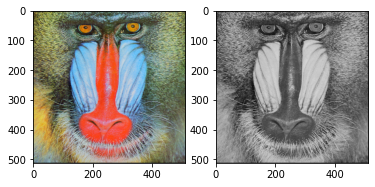

In [51]:
#c. Luminance

original = cv.cvtColor(cv.imread('/content/drive/MyDrive/Polinema/PCVK_2021/images/mandrill.tiff'), cv.COLOR_BGR2RGB)
original_lm = np.zeros(original.shape, original.dtype)
R, G, B = original[:, :, 2], original[:, :, 1], original[:, :, 0]

original_lms = 0.21*R + 0.72*G+ 0.07*B

original_lm[:, :, 2] = original_lms
original_lm[:, :, 1] = original_lms
original_lm[:, :, 0] = original_lms



fig, axs = plt.subplots(1, 2)
axs[0].imshow(original)
axs[1].imshow(original_lm)

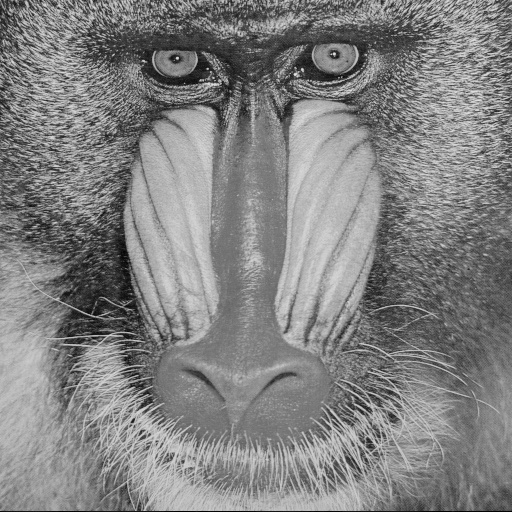

In [92]:
#4. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale.

# original = cv.cvtColor(cv.imread('/content/drive/MyDrive/Polinema/PCVK_2021/images/mandrill.tiff'), cv.COLOR_BGR2RGB)
# original_r = np.zeros(original.shape, original.dtype)
# R, G, B = original[:, :, 2], original[:, :, 1], original[:, :, 0]

# original_red = 0.21*R + 1*G + 1*B

# original_r[:, :, 2] = original_red
# original_r[:, :, 1] = original_red
# original_r[:, :, 0] = original_red



# fig, axs = plt.subplots(1, 2)
# axs[0].imshow(original)
# axs[1].imshow(original_r)

original_re = cv.cvtColor(cv.imread('/content/drive/MyDrive/Polinema/PCVK_2021/images/mandrill.tiff'), cv.COLOR_BGR2GRAY)



for i in range(x):
    for j in range(y):
        if (original_re[i,j,0]<210 and original_re[i,j,1]<160):
            original_re[i,j]= np.mean(original_re[i,j])
            original_re[:,:,2] = 0

cv2_imshow(original_re)